## March 19 HV Scan Plots
##### *Ella Majkic, PUMA Testing Phase*

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


print("Sucessful Import")

Sucessful Import


In [24]:
#starting with first file go through computations (20 files -> 20 iterations)

VG = 0.8
VA = 1.6

#store cathode input charges in array [order is increasing VA and VG]
cathodeInputCharges = []

for _ in range(20): 
    file_name = f"HVscan_VA{round(VA, 2)}_VG{round(VG, 2)}.txt"
    #print(file_name)
    VG = VG + 0.8
    VA = VA + 1.6

    data = pd.read_csv(file_name, sep="\s+", skiprows=1, header=None)
    time = data.index  # row index represents time steps

    # taking cathode signal
    columnsToAvg = data.iloc[:, 0::2]  

    # average cathode signal over 10 runs
    avgCathodeSig = columnsToAvg.mean(axis=1) 

    # obtain basline signal
    cathodeSig1 = data.iloc[:, 0]
    baseline = cathodeSig1.iloc[:4000].mean()

    avgCathodeMinusBaseline = avgCathodeSig - baseline
    
    #numerically integrate cathode signal to get pulse area (first approx. -> rectangles)
    pulseArea = avgCathodeMinusBaseline.sum()*(2)*(10**(-9))

    inputCharge = pulseArea / (220*10**(3))
    

#### Example:  1. VA = 1.6, VG = 0.8

In [5]:
data = pd.read_csv('HVscan_VA1.6_VG0.8.txt', sep="\s+", skiprows=1, header=None)
#print(data)

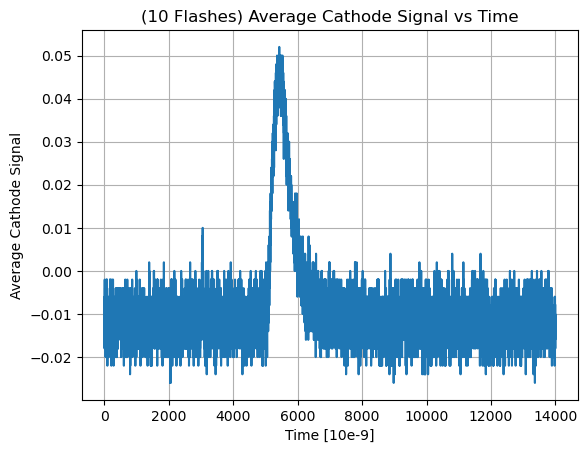

In [42]:
time = data.index  # row index represents time steps

# taking cathode signal
columnsToAvg = data.iloc[:, 0::2]  

# average cathode signal over 10 runs
avgCathodeSig = columnsToAvg.mean(axis=1)  

plt.plot(time, avgCathodeSig)
plt.xlabel('Time [10e-9]')
plt.ylabel('Average Cathode Signal')
plt.title('(10 Flashes) Average Cathode Signal vs Time')
plt.grid(True)
plt.show()

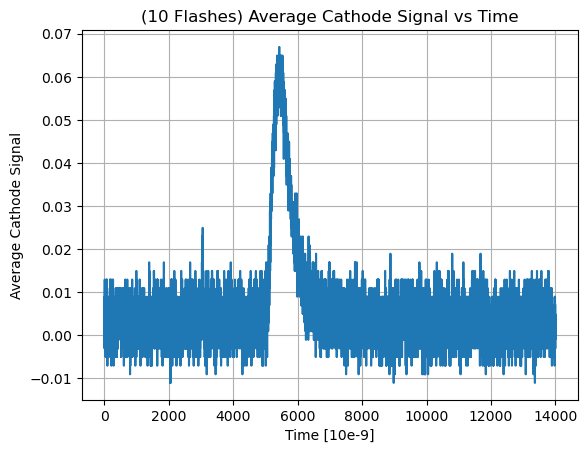

In [44]:
cathodeSig1 = data.iloc[:, 0]

baseline = cathodeSig1.iloc[:4000].mean()

avgCathodeMinusBaseline = avgCathodeSig - baseline

plt.plot(time, avgCathodeMinusBaseline)
plt.xlabel('Time [10e-9]')
plt.ylabel('Average Cathode Signal')
plt.title('(10 Flashes) Average Cathode Signal vs Time')
plt.grid(True)
plt.show()

In [51]:
#numerically integrate cathode signal to get pulse area (first approx. -> rectangles)
pulseArea = avgCathodeMinusBaseline.sum()*(2)*(10**(-9))
#print(pulseArea)

inputCharge = pulseArea / (220*10**(3))
#print(inputCharge)

7.970459545454547e-13
